In [2]:
%matplotlib inline

import numpy as np
import cvxpy as cvx
from matplotlib import pyplot as plt

# Nonnegative deconvolution

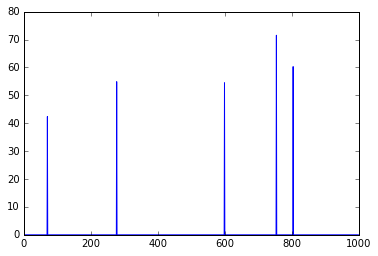

In [55]:
np.random.seed(0)
n = 1000
sigma = n/10
k = 5

x0 = np.zeros(n)
x0[np.random.choice(n,k)] = np.random.rand(k)*n/10
plt.plot(x0)

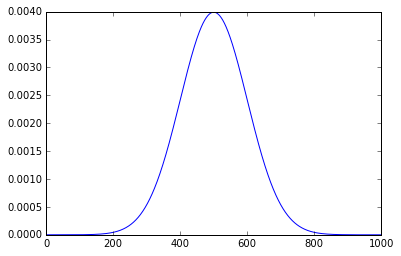

In [63]:
c = np.exp(-np.arange(-n/2., n/2.)**2./(2*sigma**2))/np.sqrt(2*sigma**2*np.pi)
c[c < 1e-6] = 0
plt.plot(c)

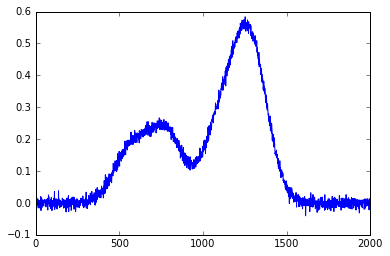

In [65]:
b = np.convolve(c, x0) 
b += np.linalg.norm(b)/20/np.sqrt(2*n-1)*np.random.randn(2*n-1)
plt.plot(b)

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 816002, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 1001, constraints m = 3001
Cones:	linear vars: 1000
	soc vars: 2001, soc blks: 1
Setup time: 4.53e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.22e+00  8.17e-01  9.22e-01 -1.16e+01  2.51e-01  3.49e-15  7.49e-02 
   100| 1.94e-03  5.57e-06  1.58e-05  2.29e-01  2.29e-01  1.39e-15  2.84e+00 
   200| 8.96e-04  3.02e-06  3.95e-05  2.29e-01  2.29e-01  1.39e-15  5.57e+00 
---------------------------

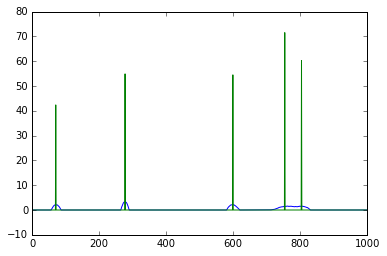

In [71]:
x = cvx.Variable(n)
f = cvx.sum_squares(cvx.conv(c, x) - b)
prob = cvx.Problem(cvx.Minimize(f), [x >= 0])
prob.solve(solver=cvx.SCS, verbose=True)
plt.plot(x.value)
plt.plot(x0)

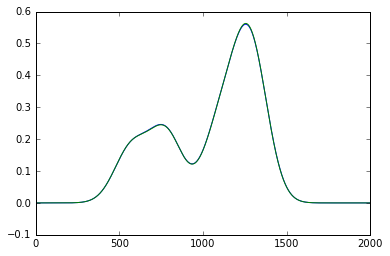

In [73]:
plt.plot(cvx.conv(c, x).value)
plt.plot(np.convolve(c, x0))